### 3.7

__Consider the problem of finding the shortest path between two points on a plane that has convex polygonal obstacles as shown in Figure 3.31. This is an idealization of the problem that a robot has to solve to navigate in a crowded environment.__

![](https://raw.githubusercontent.com/rayheberer/AI-A-Modern-Approach/master/img/3/Figure-3-31.png)

__a. Suppose the state space consists of all positions (x,y) in the plane. How many states are there? How many paths are there to the goal?__

If *x* and *y* are continuous spacial variables, then there are infinite states, and infinite paths to the goal. 

If *x* and *y* are made to be discrete, then the number of states will be proportional to max(*x*)max(*y*), where the constant of proportionality is the number of allowable values within a distance of 1 multiplied by the fraction of the plane not taken up by the obstacles.

The number of paths will scale roughly proportional to the factorial of the number of states, since in a plane with no obstacles every state would be reachable from every other state. In this case, if cycles are not permitted in paths, then if there are N states besides the goal states, then for the last step on the path, there are N possible states, for the second-to-last step, N-1 states, and so on.

__b. Explain briefly why the shortest path from one polygon vertex to any other in the scene must consist of straight-line segments joining some of the vertices of the polygons. Define a good state space now. How large is this state space?__

The shortest path between one polygon vertex and another vertex on the same polygon is by definition a line, and the same goes for paths between vertices on separate polygons.

If there is an obstacle between two vertices, then the shortest path will be from the first vertex, to the vertex of the obstacle, to the second vertex. For example, the path from __S__ to the lower vertex of the pentagon in Figure 3.31 first travels to the upper-left vertex of the intervening rectangle. If instead the path were to visit a point in the plane a above or to the left of the rectangle's vertex, then the four-sided polygon consisting of __S__, the goal, the point directly below the goal and to the right of __S__, and the point visited by the path will contain the polygon made similarly with the vertex of the rectangle as its fourth point. Therefore, the perimeter of the outer polygon will be greater, and since its bottom and right edges are identical to the inner one, this is because the upper-left edges are longer. Therefore, the shortest paths directly visit vertices of intervening obstacles.

Taking this into account, a good state space consists of each vertex in the plane, plus the starting and goal states. In Figure 3.31, the size of the state space would be $N=35$. In general it would be $N=V + 2$, where $V$ is the number of vertices in the plane.

__c. Define the necessary functions to implement the search problem, including an `ACTIONS` function that takes a vertex as input and returns a set of vectors, each of which maps the current vertex to one of the vertices that can be reached in a straight line. (Do not forget the neighbors on the same polygon.) Use the straight-line distance for the heuristic function.__

In [41]:
import matplotlib.pyplot as plt

class Vertex(object):
    def __init__(self, x, y, name):
        self.location = (x, y)
        self.name = name
        self.reachable = {}
        self.edges = []
        
class StateSpace(object):
    def __init__(self):
        self.vertices = {}
        self.edges = []
        self.start = None
        self.goal = None
        
    def add_vertex(self, x, y, name):
        """Add a vertex to the list of vertices in the state."""
        self.vertices[name] = Vertex(x, y, name)
        
    def set_start(self, x, y, name='S'):
        start = Vertex(x, y, name)
        self.vertices[name] = start
        self.start = start
        
    def set_goal(self, x, y, name='G'):
        goal = Vertex(x, y, name)
        self.vertices[name] = goal
        self.goal = goal
        
    def add_edge(self, a, b):
        """Add a polygon edge linking two vertices."""
        assert a in self.vertices and b in self.vertices
        
        self.vertices[a].edges.append(b)
        self.vertices[b].edges.append(a)
        
        self.edges.append(([self.vertices[a].location[0], 
                            self.vertices[b].location[0]], 
                           [self.vertices[a].location[1], 
                            self.vertices[b].location[1]]))
        
        # reachable by default
        self.assert_reachable(a, b)
        
    def connect_polygon(self, v_names):
        for i in range(len(v_names) - 1):
            self.add_edge(v_names[i], v_names[i+1])
        self.add_edge(v_names[0], v_names[-1])
        
    def assert_reachable(self, a, b):
        """Assert that two vertices are reachable from each other."""
        assert a in self.vertices and b in self.vertices
        
        delta_x = self.vertices[b].location[0] - self.vertices[a].location[0]
        delta_y = self.vertices[b].location[1] - self.vertices[a].location[1]
        
        self.vertices[a].reachable[(delta_x, delta_y)] = b
        self.vertices[b].reachable[(-delta_x, -delta_y)] = a
        
    def draw(self):
        fig, ax = plt.subplots()
        for edge in self.edges:
            ax.plot([*edge[0]], [*edge[1]], color='black')
            
        if self.start:
            ax.plot(*self.start.location, 'bo')
        if self.goal:
            ax.plot(*self.goal.location, 'go')
    
class SearchAgent(object):
    def __init__(self, initial_vertex):
        self.location = initial_vertex
        
    def move(vector):
        assert vector in self.location.reachable, "Not a valid move."

        self.location = self.location.reachable[vector]
    
def ACTIONS(vertex):
    return vertex.reachable.keys()

In [45]:
env = StateSpace()

# start
env.set_start(0, 0.7)

# rectangle
env.add_vertex(0.5, 0, 'rec1')
env.add_vertex(0.5, 1.4, 'rec2')
env.add_vertex(4.6, 1.4, 'rec3')
env.add_vertex(4.6, 0, 'rec4')

env.connect_polygon(['rec1', 'rec2', 'rec3', 'rec4'])

# pentagon
env.add_vertex(0, 3.8, 'pent1')
env.add_vertex(0.3, 2.3, 'pent2')
env.add_vertex(1.7, 2, 'pent3')
env.add_vertex(2.6, 3.7, 'pent4')
env.add_vertex(1.5, 5.1, 'pent5')

env.connect_polygon(['pent1', 'pent2', 'pent3', 'pent4', 'pent5'])

# triangle
env.add_vertex(2.5, 1.8, 'tri1')
env.add_vertex(3.7, 1.8, 'tri2')
env.add_vertex(3.1, 4, 'tri3')

env.connect_polygon(['tri1', 'tri2', 'tri3'])

# quadrilateral
env.add_vertex(3.9, 3.3, 'quad1')
env.add_vertex(5.7, 4.4, 'quad2')
env.add_vertex(4.8, 5.1, 'quad3')
env.add_vertex(3.7, 4.9, 'quad4')

env.connect_polygon(['quad1', 'quad2', 'quad3', 'quad4'])

# triangle 2

# rectangle 2

# hexagon

# quadrilateral 2

# goal
env.set_goal(9.1, 5)

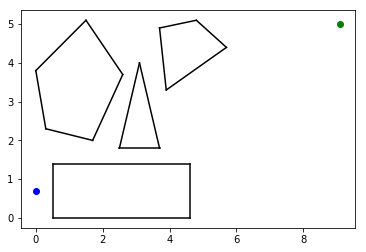

In [46]:
env.draw()

__d. Apply one or more of the algorithms in this chapter to solve a range of problems in the domain, and comment on their performance.__